In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [70]:
column_names = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education Level', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed','Credit Score', 'Drivers License', 'Citizen',	'Zip Code',	'Income', 'Approved']

In [71]:
    data = pd.read_csv(r'crx.data', names = column_names)

In [72]:
data.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zip Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   Bank Customer    690 non-null    object 
 5   Education Level  690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    object 
 9   Employed         690 non-null    object 
 10  Credit Score     690 non-null    int64  
 11  Drivers License  690 non-null    object 
 12  Citizen          690 non-null    object 
 13  Zip Code         690 non-null    object 
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [74]:
data.shape

(690, 16)

<AxesSubplot:>

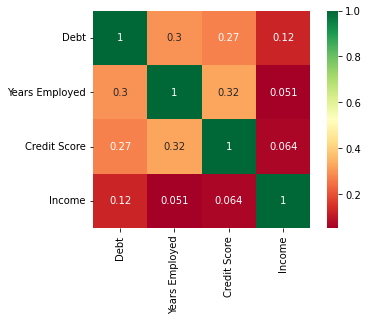

In [75]:
#sns ip
sns.heatmap(data.corr(), square=True, annot=True, cmap='RdYlGn')

<AxesSubplot:xlabel='Approved', ylabel='count'>

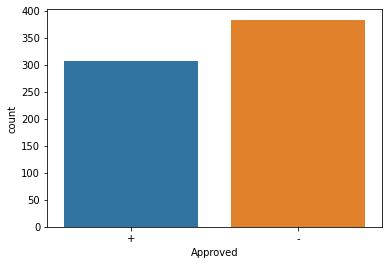

In [76]:
sns.countplot(data = data, x = 'Approved')

In [77]:
data.skew()

C:\Users\USER\AppData\Local\Temp\ipykernel_16376\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Debt               1.488813
Years Employed     2.891330
Credit Score       5.152520
Income            13.140655
dtype: float64

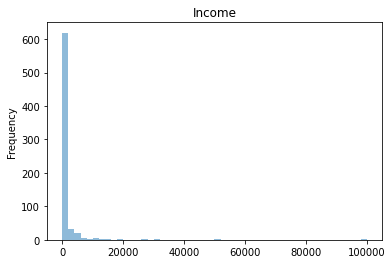

In [78]:
ax1= data['Income'].plot.hist(bins=50, alpha=0.5, title='Income')

In [79]:
#Missing value

In [80]:
data.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education Level    0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Drivers License    0
Citizen            0
Zip Code           0
Income             0
Approved           0
dtype: int64

In [81]:
data.head(10)

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zip Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [82]:
data[data.isin(["?"]).any(axis=1)]

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zip Code,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


In [83]:
#Replace the value
data = data.replace('?', np.nan)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   Bank Customer    684 non-null    object 
 5   Education Level  681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    object 
 9   Employed         690 non-null    object 
 10  Credit Score     690 non-null    int64  
 11  Drivers License  690 non-null    object 
 12  Citizen          690 non-null    object 
 13  Zip Code         677 non-null    object 
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [85]:
#Preprocessing the data
data['Age'] = data['Age'].astype('float').round()

In [86]:
def prep_data(dataframe):

    # Make a copy of the dataset, to avoid corruption
    df = dataframe.copy()

    # Impute the missing values with mean imputation
    df.fillna(df.mean(), inplace=True)

    # Rename the target variables into numeric values
    df.loc[df['Approved'] == '+', 'Approved'] = 1
    df.loc[df['Approved'] == '-', 'Approved'] = 0

    return(df)

# Input the orginal dataset into the function
data = prep_data(data)

C:\Users\USER\AppData\Local\Temp\ipykernel_16376\1824650727.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [87]:
# Iterate over each column
for col in data.columns:

    # Check if the column is of object type
    if data[col].dtype == 'object':

        # Impute with the most frequent value
        data = data.fillna(data[col].value_counts().index[0])

In [88]:
# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column, extracting their dtypes and transforming them into numeric types.
for col in data.columns:

    #Compare
    if data[col].dtype == 'object':

        # Use LabelEncoder to do the numeric transformation
        data[col] = le.fit_transform(data[col])

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    int32  
 1   Age              690 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          690 non-null    int32  
 4   Bank Customer    690 non-null    int32  
 5   Education Level  690 non-null    int32  
 6   Ethnicity        690 non-null    int32  
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    int32  
 9   Employed         690 non-null    int32  
 10  Credit Score     690 non-null    int64  
 11  Drivers License  690 non-null    int32  
 12  Citizen          690 non-null    int32  
 13  Zip Code         690 non-null    int32  
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    int64  
dtypes: float64(3), int32(10), int64(3)
memory usage: 59.4 KB


# Train And Test

In [90]:
data = data.drop([data.columns[11], data.columns[13]], axis=1)
data = data.values

X,y = data[:,0:13] , data[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(X_train)

rescaledX_test = scaler.transform(X_test)

In [92]:
logreg = LogisticRegression(solver='lbfgs')

logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [93]:
probas = logreg.predict_proba(rescaledX_test)

y_pred = (probas[:, 1] >= 0.5).astype(int)


confusion_matrix(y_test, y_pred)

array([[98, 27],
       [ 9, 94]], dtype=int64)

In [94]:
print(probas)

[[0.84175403 0.15824597]
 [0.30079631 0.69920369]
 [0.94181871 0.05818129]
 [0.92511181 0.07488819]
 [0.9734551  0.0265449 ]
 [0.48844381 0.51155619]
 [0.97293109 0.02706891]
 [0.34678037 0.65321963]
 [0.94433224 0.05566776]
 [0.94015346 0.05984654]
 [0.92362598 0.07637402]
 [0.28228475 0.71771525]
 [0.94017598 0.05982402]
 [0.26479278 0.73520722]
 [0.80810964 0.19189036]
 [0.16683966 0.83316034]
 [0.96907964 0.03092036]
 [0.86386799 0.13613201]
 [0.9332243  0.0667757 ]
 [0.96575002 0.03424998]
 [0.86236418 0.13763582]
 [0.94195392 0.05804608]
 [0.97193638 0.02806362]
 [0.26580929 0.73419071]
 [0.97511098 0.02488902]
 [0.93146685 0.06853315]
 [0.04932822 0.95067178]
 [0.28149006 0.71850994]
 [0.93546642 0.06453358]
 [0.93221727 0.06778273]
 [0.1524044  0.8475956 ]
 [0.09749019 0.90250981]
 [0.28473042 0.71526958]
 [0.169403   0.830597  ]
 [0.30238477 0.69761523]
 [0.12814005 0.87185995]
 [0.04701882 0.95298118]
 [0.26382021 0.73617979]
 [0.15530493 0.84469507]
 [0.06113183 0.93886817]


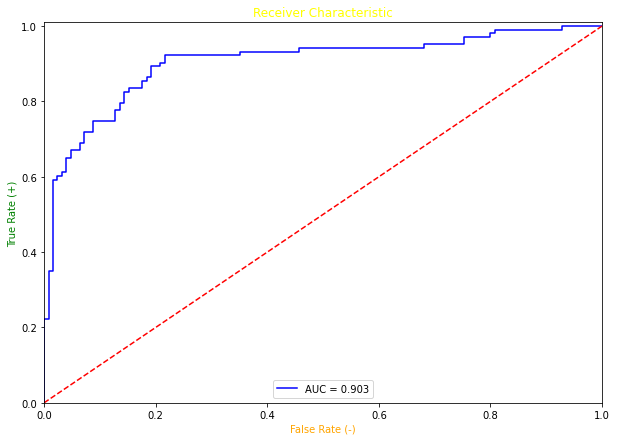

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,7))
plt.title('Receiver Characteristic',color="yellow")
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower center')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.ylabel('True Rate (+)',color="Green")
plt.xlabel('False Rate (-)',color="orange")
plt.show()

In [96]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold =', optimal_threshold)

Optimal Threshold = 0.4446967567815103


In [97]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84       125
         1.0       0.78      0.91      0.84       103

    accuracy                           0.84       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.85      0.84      0.84       228



# Grid Search

In [98]:
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]
penalty = ['l2']
param_grid = dict(tol=tol, max_iter=max_iter, penalty=penalty)
print(param_grid)

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200], 'penalty': ['l2']}


In [99]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

In [100]:
rescaledX = scaler.fit_transform(X)

In [101]:
grid_model_result = grid_model.fit(rescaledX, y)

In [102]:
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %s using %s" % (best_score, best_params))

Best: 0.8507246376811594 using {'max_iter': 100, 'penalty': 'l2', 'tol': 0.01}
